<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read data</a></span><ul class="toc-item"><li><span><a href="#Costanzo-related-data" data-toc-modified-id="Costanzo-related-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Costanzo related data</a></span></li><li><span><a href="#YURI" data-toc-modified-id="YURI-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>YURI</a></span></li></ul></li><li><span><a href="#Plots" data-toc-modified-id="Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plots</a></span></li></ul></div>

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import igraph
import itertools as itr
from enm.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from mlxtend.evaluate import permutation_test 
from enm.enm import igraph_network

In [3]:
os.chdir('../')

# Read data

## Costanzo related data

In [4]:

# Random collectivity
data_path = 'data/interim/pcc_0603/'
with open(f'{data_path}/rewire_data_er.pickle','rb') as f:
    e_er = pickle.load(f)
with open(f'data/interim/pcc_0601/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)
with open(f'{data_path}/rewire_data_nodegseq.pickle','rb') as f:
    e_nodegseq = pickle.load(f)
figure_path = e_er[0].figure_path = e_pcc.figure_path = e_nodegseq[0].figure_path = 'reports/figures/pcc_prs_0722/'
figure_path =e_pcc.figure_path ='reports/figures/pcc_prs_0722/'
e_pcc.e_list[0].figure_path=figure_path


In [5]:

# correlation_density
er_df = pd.read_csv(f'{data_path}/rewire_data_er.csv')
nodegseq_df = pd.read_csv(f'{data_path}/rewire_data_nodegseq.csv')
#e_pcc.plot_correlation_density(x='eff',y='deg',figure_extension='png')
#plot_correlation_density(e_pcc.df, [e_pcc.rewire_df,nodegseq_df,er_df], x='eff', y='deg', figure_path=figure_path, figure_extension='png')
#plot_correlation_density(e_pcc.df, [e_pcc.rewire_df,nodegseq_df,er_df], x='sens', y='deg', figure_path=figure_path, figure_extension='png',correlation='spearman')



In [6]:
pcc_eff_deg = e_pcc.df.loc[:,['eff','deg']].corr().iloc[0,1]
pcc_sens_deg = e_pcc.df.loc[:,['sens','deg']].corr('spearman').iloc[0,1]

In [7]:
pcc_sens_deg

-0.027541794568606212

## YURI related data

In [313]:
from enm.enm import Enm

#yuri = Enm('yuri')
#yuri.read_network('data/interim/yuri/yuri_combined.csv')
#yuri.gnm_analysis()
with open("data/interim/yuri/yuri.pickle",'rb') as f:
    
    yuri = pickle.load(f)

In [314]:
yuri_rewire_df = pd.read_csv('data/interim/yuri/rewire_data.csv')

In [315]:
yuri_eff_deg = yuri.df.loc[:,['eff','deg']].corr().iloc[0,1]
yuri_sens_deg = yuri.df.loc[:,['sens','deg']].corr('spearman').iloc[0,1]

## HURI related data

In [316]:

with open("data/interim/huri/huri.pickle",'rb') as f:
    
    huri = pickle.load(f)


In [317]:
huri_rewire_df = pd.read_csv('data/interim/huri/rewire_data.csv')

In [318]:
huri_eff_deg = huri.df.loc[:,['eff','deg']].corr().iloc[0,1]
huri_sens_deg = huri.df.loc[:,['sens','deg']].corr('spearman').iloc[0,1]

# Plots

In [18]:
labels=['Costanzo','Costanzo\nrewired','YURI','YURI\nrewired','HURI','HURI\nrewired','ER','BA']

In [81]:
def plot_correlation_combined(data, labels,y_label='pearson correlation',title='',filename=''):
    fig,ax = plt.subplots(figsize=(10,5))
    ax.scatter(0,data[0])
    ax.boxplot(data[1],positions=[1])
    ax.scatter(2,data[2])
    ax.boxplot(data[3],positions=[3])
    ax.scatter(4,data[4])
    ax.boxplot(data[5],positions=[5])
    ax.boxplot(data[6],positions=[6])
    ax.boxplot(data[7],positions=[7])
    #for i in len(data):
    

    #ax.scatter(1,pcc_eff_deg)
    #ax.scatter(2,er_df.eff_deg_pearson.mean())
    ax.get_xaxis().set_tick_params(direction='out')
    ax.set_xticks([i for i in range(len(data))])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticklabels(labels)
    ax.set_ylabel(f"{y_label}")
    ax.set_title(f"{title}")
    plt.savefig(filename)
    plt.show()

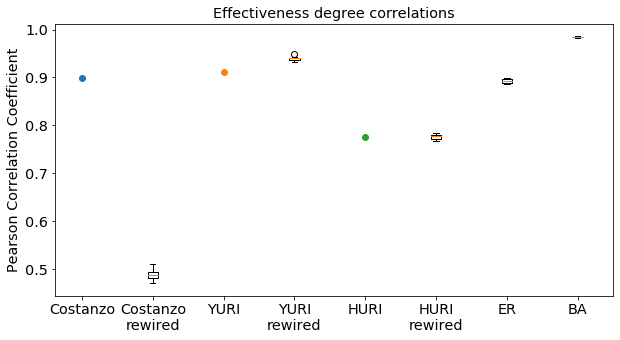

In [82]:
plot_correlation_combined([pcc_eff_deg,
                          e_pcc.rewire_df.eff_deg_pearson,
                          yuri_eff_deg,
                          yuri_rewire_df.eff_deg_pearson,
                          huri_eff_deg,
                          huri_rewire_df.eff_deg_pearson,
                          er_df.eff_deg_pearson,
                          nodegseq_df.eff_deg_pearson],labels,y_label='Pearson Correlation Coefficient',title="Effectiveness degree correlations",filename='reports/figures/prs_comparison_0722/eff_deg.png')


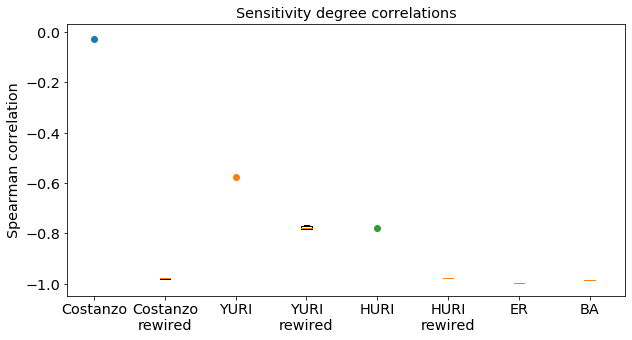

In [83]:
plot_correlation_combined([pcc_sens_deg,
                          e_pcc.rewire_df.sens_deg_spearman,
                          yuri_sens_deg,
                          yuri_rewire_df.sens_deg_spearman,
                          huri_sens_deg,
                          huri_rewire_df.sens_deg_spearman,
                          er_df.sens_deg_spearman,
                          nodegseq_df.sens_deg_spearman],labels,y_label='Spearman correlation',title="Sensitivity degree correlations",filename='reports/figures/prs_comparison_0722/sens_deg.png')



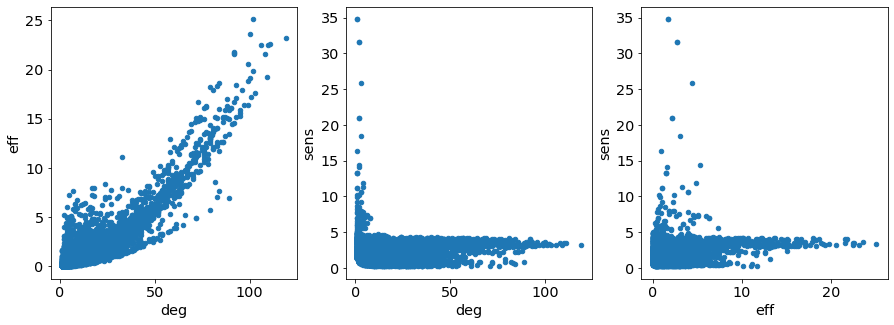

In [63]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
e_pcc.df.plot.scatter('eff','sens',ax=ax3)
e_pcc.df.plot.scatter('deg','sens',ax=ax2)
e_pcc.df.plot.scatter('deg','eff',ax=ax1)

plt.savefig('reports/figures/prs_comparison_0722/eff_deg_sens.png')

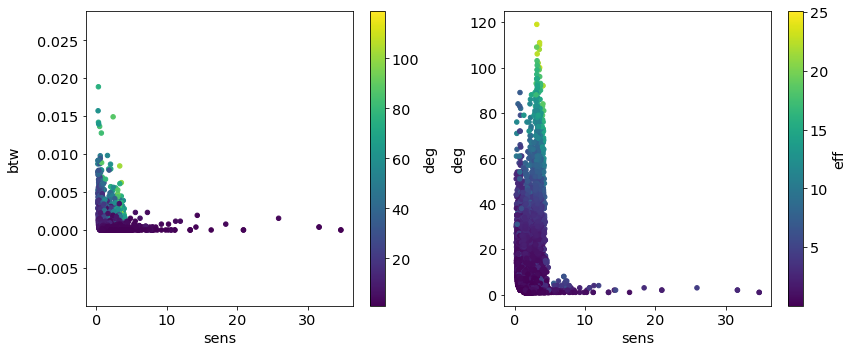

In [137]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
e_pcc.df.plot.scatter('sens','deg',ax=ax[1], c = 'eff',colormap='viridis')
#ax[0].set_ylim(0,0.02)
e_pcc.df.plot.scatter('sens','btw',ax=ax[0], c = 'deg',colormap='viridis')
#ax[1].set_ylim(0,0.02)
plt.tight_layout()
#plt.savefig('reports/figures/prs_comparison_0722/eff_deg_btw.png')

In [104]:
def divide_quantiles(row, col,val=0.5):
    if row >  np.quantile(col,0.99):
        return '>99%'
    elif row < np.quantile(col,0.99) and row > np.quantile(col,0.95):
        return '95%<x<99%'
    elif row < np.quantile(col,0.95) and row > np.quantile(col,0.90):
        return '90%<x<95%'
    elif row < np.quantile(col,0.90) and row > np.quantile(col,0.80):
        return '80%<x<90%'
    elif row < np.quantile(col,0.8) and row > np.quantile(col,0.7):
        return '70%<x<80%'
    elif row < np.quantile(col,0.7) and row > np.quantile(col,0.6):
        return '60%<x<70%'
    elif row < np.quantile(col,0.6) and row > np.quantile(col,0.5):
        return '50%<x<60%'
    elif row < np.quantile(col,0.5) and row > np.quantile(col,0.4):
        return '40%<x<50%'
    elif row < np.quantile(col,0.4) and row > np.quantile(col,0.3):
        return '30%<x<40%'
    elif row < np.quantile(col,0.3) and row > np.quantile(col,0.2):
        return '20%<x<30%'
    elif row < np.quantile(col,0.2) and row > np.quantile(col,0.1):
        return '10%<x<20%'
    else:
        return "<10%"
df = e_pcc.df
df['combo'] = df.sens.apply(divide_quantiles,col=df.sens)

In [105]:
df['combo']

0            <10%
1       40%<x<50%
2       10%<x<20%
3            <10%
4       30%<x<40%
          ...    
5178    60%<x<70%
5179    90%<x<95%
5180    90%<x<95%
5181    70%<x<80%
5182    90%<x<95%
Name: combo, Length: 5183, dtype: object

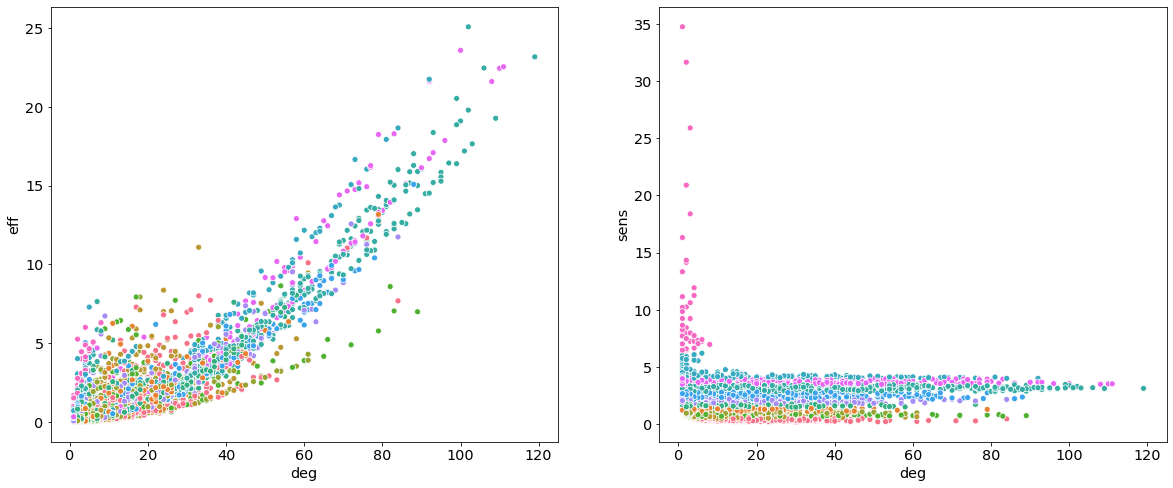

In [109]:
e_pcc.df['sensor']=np.where(e_pcc.df.sens>np.quantile(e_pcc.df.sens,0.99),'sensor','not')

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
sns.scatterplot(x='deg',y='eff',hue='combo',data=e_pcc.df,ax=ax1,legend=False)
sns.scatterplot(x='deg',y='sens',hue='combo',data=e_pcc.df,ax=ax2,legend=False)
#sns.scatterplot(x='eff',y='sens',hue='combo',data=e_pcc.df,ax=ax3,legend=False)
plt.show()
#e_pcc.df.plot.scatter('deg','sens',ax=ax2)
#e_pcc.df.plot.scatter('deg','eff',ax=ax1)

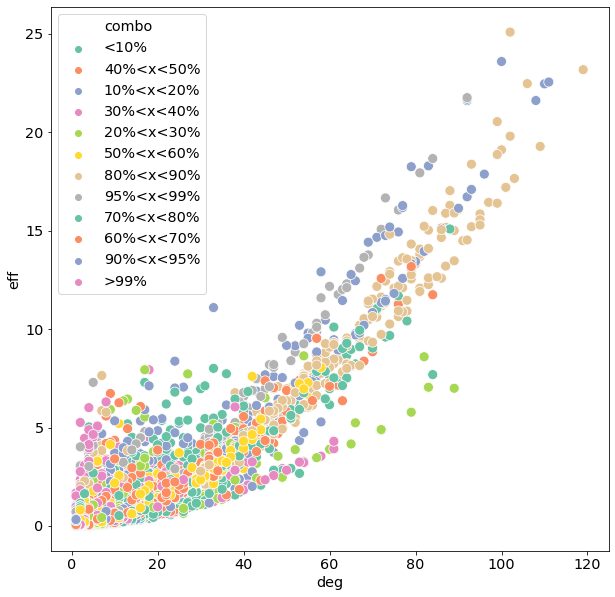

In [124]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='deg',y='eff',hue='combo',data=e_pcc.df,s=100,palette='Set2')
plt.show()

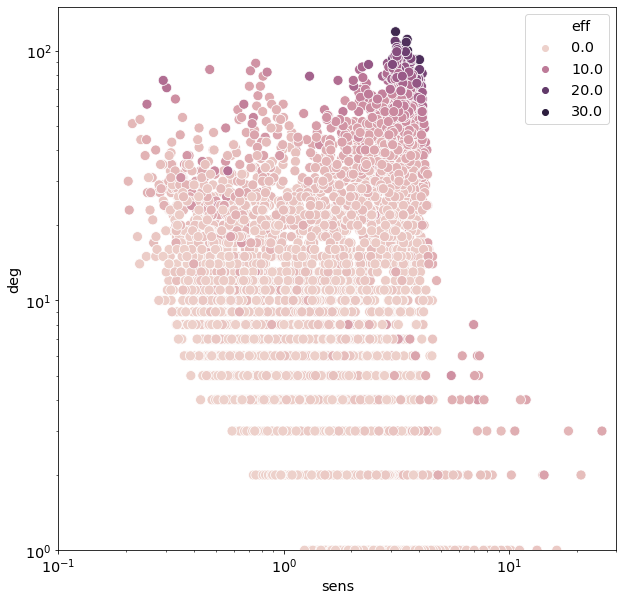

In [132]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x='sens',y='deg',hue='eff',data=e_pcc.df,s=100)
ax.set_ylim(1,150)
ax.set_xlim(0.1,30)
plt.show()

# Mean shortest path length and clustering coeff comparison

In [319]:
avg_clus = {}
avg_path = {}

In [320]:
pcc_ig = igraph_network(e_pcc.graph_gc)
yuri_ig = igraph_network(yuri.graph_gc)
huri_ig = igraph_network(huri.graph_gc)

In [321]:
avg_clus['pcc'] = pcc_ig.transitivity_undirected()
avg_clus['yuri'] = yuri_ig.transitivity_undirected()
avg_clus['huri'] = huri_ig.transitivity_undirected()

avg_path['pcc'] = pcc_ig.average_path_length()
avg_path['yuri'] = yuri_ig.average_path_length()
avg_path['huri'] = huri_ig.average_path_length()

In [322]:
avg_path

{'pcc': 4.732256829600497, 'yuri': 5.391322046079171, 'huri': 3.84430367851937}

In [323]:
avg_clus

{'pcc': 0.4485202740256415,
 'yuri': 0.02400840294102936,
 'huri': 0.055841382699062456}

In [324]:
avg_clus_rnd = []
avg_path_rnd = []
for i in range(10):
    rnd = igraph_network(e_pcc.e_list[i].graph_gc)
    avg_clus_rnd.append(rnd.transitivity_undirected())
    avg_path_rnd.append(rnd.average_path_length())
avg_clus[f'pcc_rnd']=avg_clus_rnd
avg_path[f'pcc_rnd']=avg_path_rnd

In [325]:
avg_clus_rnd = []
avg_path_rnd = []
for i in range(10):
    rnd = igraph_network(yuri.e_list[i].graph_gc)
    avg_clus_rnd.append(rnd.transitivity_undirected())
    avg_path_rnd.append(rnd.average_path_length())
avg_clus[f'yuri_rnd']=avg_clus_rnd
avg_path[f'yuri_rnd']=avg_path_rnd

In [326]:
avg_clus_rnd = []
avg_path_rnd = []
for i in range(10):
    rnd = igraph_network(huri.e_list[i].graph_gc)
    avg_clus_rnd.append(rnd.transitivity_undirected())
    avg_path_rnd.append(rnd.average_path_length())
avg_clus[f'huri_rnd']=avg_clus_rnd
avg_path[f'huri_rnd']=avg_path_rnd

In [342]:
avg_clus['er']=[igraph_network(e_er[i].graph_gc).transitivity_undirected() for i in range(10)]
avg_path['er']=[igraph_network(e_er[i].graph_gc).average_path_length() for i in range(10)]

avg_clus['ba']=[igraph_network(e_nodegseq[i].graph_gc).transitivity_undirected() for i in range(10)]
avg_path['ba']=[igraph_network(e_nodegseq[i].graph_gc).average_path_length() for i in range(10)]

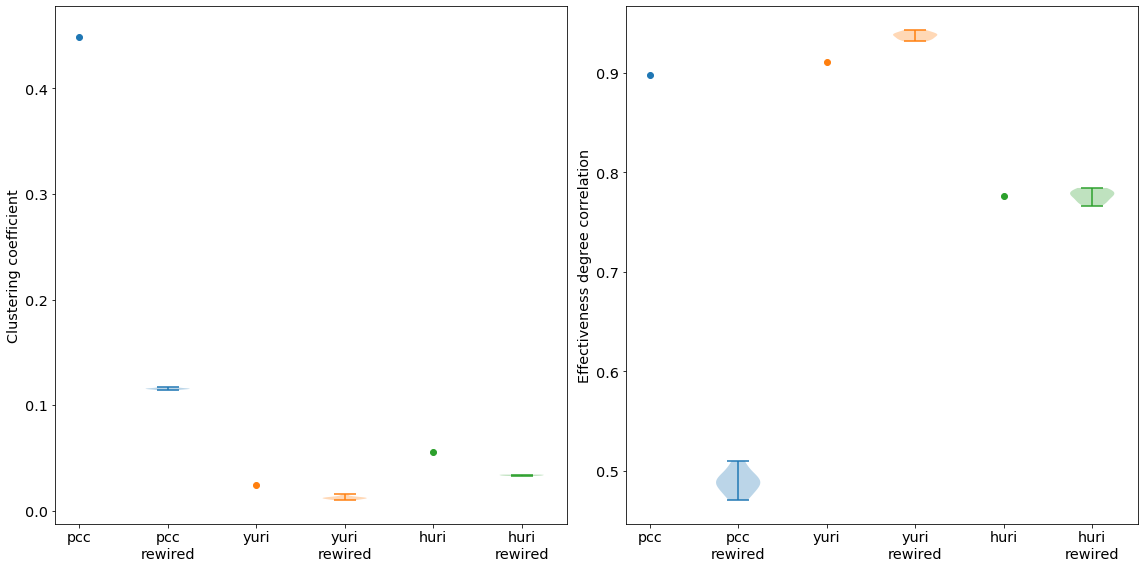

In [368]:
data = [avg_clus['pcc'],avg_clus['pcc_rnd'],avg_clus['yuri'],avg_clus['yuri_rnd'],avg_clus['huri'],avg_clus['huri_rnd']]
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].scatter(0,data[0])
ax[0].violinplot(data[1],positions=[1])
ax[0].scatter(2,data[2])
ax[0].violinplot(data[3],positions=[3])
ax[0].scatter(4,data[4])
ax[0].violinplot(data[5],positions=[5])

#for i in len(data):

labels = ['pcc','pcc\nrewired','yuri','yuri\nrewired','huri','huri\nrewired']


#ax.scatter(1,pcc_eff_deg)
#ax.scatter(2,er_df.eff_deg_pearson.mean())
ax[0].get_xaxis().set_tick_params(direction='out')
ax[0].set_xticks([i for i in range(len(data))])
ax[0].xaxis.set_ticks_position('bottom')
ax[0].set_xticklabels(labels)
ax[0].set_ylabel(f"Clustering coefficient")
#ax.set_title(f"{title}")
#plt.savefig(filename)


data =[pcc_eff_deg,
                          e_pcc.rewire_df.eff_deg_pearson,
                          yuri_eff_deg,
                          yuri_rewire_df.eff_deg_pearson,
                          huri_eff_deg,
                          huri_rewire_df.eff_deg_pearson]
#fig,ax = plt.subplots(figsize=(8,8))
ax[1].scatter(0,data[0])
ax[1].violinplot(data[1],positions=[1])
ax[1].scatter(2,data[2])
ax[1].violinplot(data[3],positions=[3])
ax[1].scatter(4,data[4])
ax[1].violinplot(data[5],positions=[5])

#for i in len(data):

#labels = ['pcc','pcc_rnd','yuri','yuri_rnd','huri','huri_rnd']


#ax.scatter(1,pcc_eff_deg)
#ax.scatter(2,er_df.eff_deg_pearson.mean())
ax[1].get_xaxis().set_tick_params(direction='out')
ax[1].set_xticks([i for i in range(len(data))])
ax[1].xaxis.set_ticks_position('bottom')
ax[1].set_xticklabels(labels)
ax[1].set_ylabel(f"Effectiveness degree correlation")
#ax.set_title(f"{title}")
plt.savefig("reports/figures/prs_comparison_0722/cc_effdeg.png")
plt.tight_layout()
plt.show()


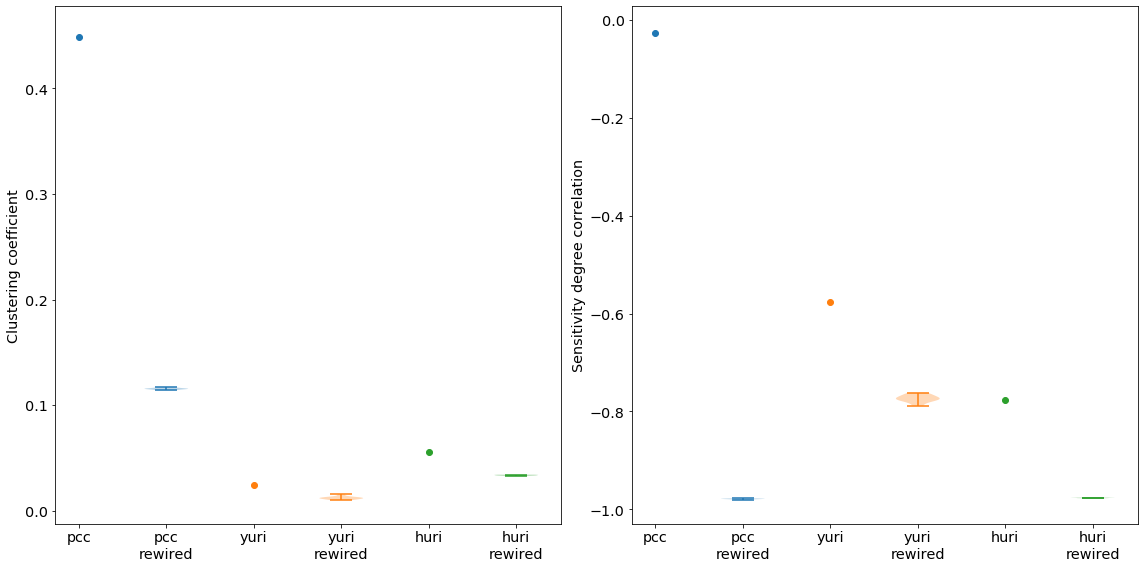

In [370]:
data = [avg_clus['pcc'],avg_clus['pcc_rnd'],avg_clus['yuri'],avg_clus['yuri_rnd'],avg_clus['huri'],avg_clus['huri_rnd']]
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].scatter(0,data[0])
ax[0].violinplot(data[1],positions=[1])
ax[0].scatter(2,data[2])
ax[0].violinplot(data[3],positions=[3])
ax[0].scatter(4,data[4])
ax[0].violinplot(data[5],positions=[5])

#for i in len(data):

labels = ['pcc','pcc\nrewired','yuri','yuri\nrewired','huri','huri\nrewired']


#ax.scatter(1,pcc_eff_deg)
#ax.scatter(2,er_df.eff_deg_pearson.mean())
ax[0].get_xaxis().set_tick_params(direction='out')
ax[0].set_xticks([i for i in range(len(data))])
ax[0].xaxis.set_ticks_position('bottom')
ax[0].set_xticklabels(labels)
ax[0].set_ylabel(f"Clustering coefficient")
#ax.set_title(f"{title}")
#plt.savefig(filename)


data =[pcc_sens_deg,
                          e_pcc.rewire_df.sens_deg_spearman,
                          yuri_sens_deg,
                          yuri_rewire_df.sens_deg_spearman,
                          huri_sens_deg,
                          huri_rewire_df.sens_deg_spearman]
#fig,ax = plt.subplots(figsize=(8,8))
ax[1].scatter(0,data[0])
ax[1].violinplot(data[1],positions=[1])
ax[1].scatter(2,data[2])
ax[1].violinplot(data[3],positions=[3])
ax[1].scatter(4,data[4])
ax[1].violinplot(data[5],positions=[5])

#for i in len(data):

#labels = ['pcc','pcc_rnd','yuri','yuri_rnd','huri','huri_rnd']


#ax.scatter(1,pcc_eff_deg)
#ax.scatter(2,er_df.eff_deg_pearson.mean())
ax[1].get_xaxis().set_tick_params(direction='out')
ax[1].set_xticks([i for i in range(len(data))])
ax[1].xaxis.set_ticks_position('bottom')
ax[1].set_xticklabels(labels)
ax[1].set_ylabel(f"Sensitivity degree correlation")
#ax.set_title(f"{title}")
plt.savefig("reports/figures/prs_comparison_0722/cc_sensdeg.png")
plt.tight_layout()
plt.show()
